IMPORTING LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORTING DATASET

In [2]:
air=pd.read_excel("/content/Airlines+Data.xlsx")

EDA

In [3]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
air.shape

(96, 2)

In [8]:
air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
air.set_index('Month', inplace=True)
air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


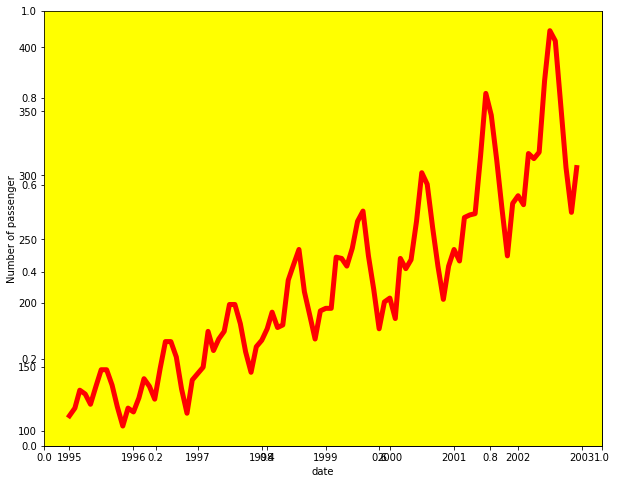

In [10]:
plt.figure(figsize=(10,8))
plt.xlabel("date")
plt.ylabel("Number of passenger")
ax = plt.axes()
ax.set_facecolor("yellow")
plt.plot(air['Passengers'], color = 'red', linewidth=5)

<AxesSubplot:>

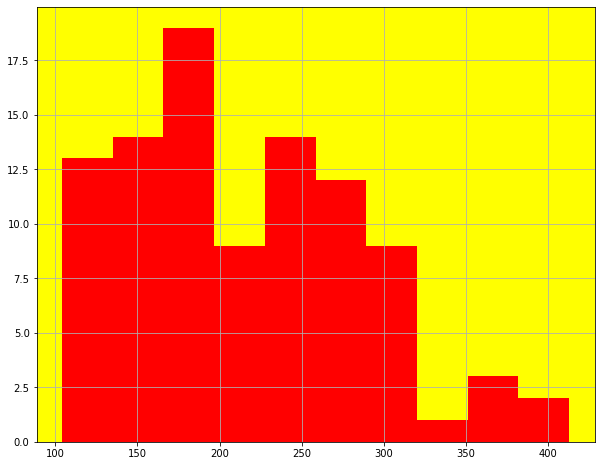

In [11]:
ax = plt.axes()
ax.set_facecolor("yellow")
air['Passengers'].hist(figsize=(10,8), color = 'red')

<AxesSubplot:ylabel='Density'>

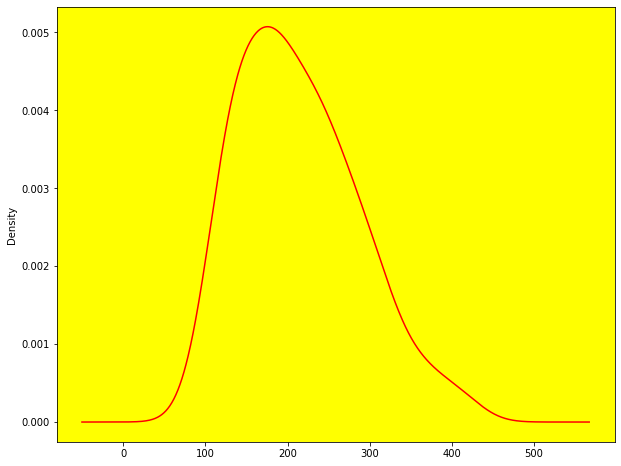

In [12]:
ax=plt.axes()
ax.set_facecolor("yellow")
air['Passengers'].plot(kind = 'kde', figsize=(10,8), color = 'red')

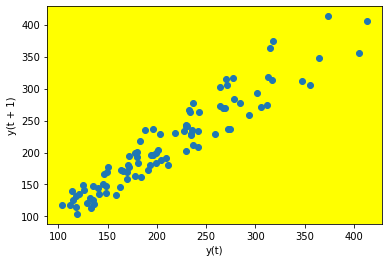

In [13]:
from pandas.plotting import lag_plot
ax = plt.axes()
lag_plot(air['Passengers'])
ax.set_facecolor("yellow")
plt.show()

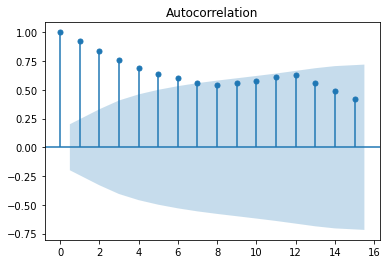

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=15)
plt.show()

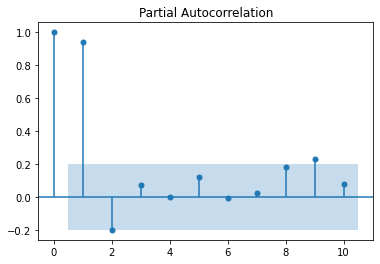

In [15]:
tsa_plots.plot_pacf(air.Passengers,lags=10)
plt.show()

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
Train = air.head(76)
Test = air.tail(20)

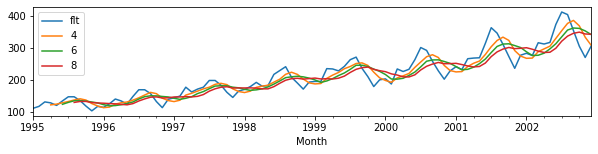

In [18]:
plt.figure(figsize=(10,2))
air.Passengers.plot(label="flt")
for i in range(4,10,2):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

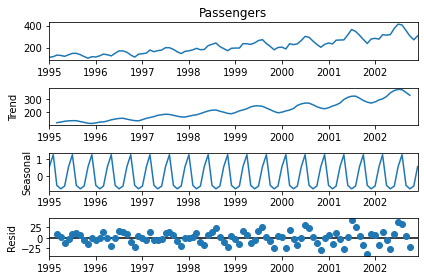

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(air.Passengers,period=5)
decompose.plot()
plt.show()

In [20]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [21]:
ses_m = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_m = RMSE(Test.Passengers, pred_ses)
rmse_ses_m

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


66.15512076060489

In [22]:
hst_m = Holt(Train["Passengers"]).fit()
pred_hst = hst_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_hst_m = RMSE(Test.Passengers, pred_hst)
rmse_hst_m

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


51.19668779419383

In [23]:
hwe_model_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add = hwe_model_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_m = RMSE(Test.Passengers, pred_hwe_add)
rmse_hwe_add_m



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


54.76912341223098

In [24]:
hwe_model_mul = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_m = RMSE(Test.Passengers, pred_hwe_mul)
rmse_hwe_mul_m

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


56.38261993424349

In [25]:
air1 = air.copy()
air1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [26]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1["log_pasenger"] = np.log(air1["Passengers"])
air1.head()

,Passengers,t,t_squared,log_pasenger
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [27]:
Train = air1.head(76)
Test = air1.tail(20)

linear model

In [28]:
import statsmodels.formula.api as smf 

lm = smf.ols('Passengers~t',data=Train).fit()
pred_l =  pd.Series(lm.predict(pd.DataFrame(Test['t'])))
rmse_lm = RMSE(Test['Passengers'], pred_l)
rmse_lm

57.000147882565884

exponentional model

In [29]:
Exp = smf.ols('log_pasenger~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Expm = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Expm

46.62154394719378

quadratic model

In [30]:
quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quadm = RMSE(Test['Passengers'], pred_quad)
rmse_quadm

58.494274639475286

arima model

In [31]:
series = air.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [32]:
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


persistance model

In [33]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [34]:
train.shape

(61,)

In [35]:
test.shape

(25,)

In [36]:
hist = [x for x in train]
pred = list()
for i in range(len(test)):
    yhat = hist[-1]
    pred.append(yhat)
    obs = test[i]
    hist.append(obs)
    print('Pred=%.3f, Expect=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, pred))
print('rmse: %.3f' % rmse)

Pred=204.000, Expect=188.000
Pred=188.000, Expect=235.000
Pred=235.000, Expect=227.000
Pred=227.000, Expect=234.000
Pred=234.000, Expect=264.000
Pred=264.000, Expect=302.000
Pred=302.000, Expect=293.000
Pred=293.000, Expect=259.000
Pred=259.000, Expect=229.000
Pred=229.000, Expect=203.000
Pred=203.000, Expect=229.000
Pred=229.000, Expect=242.000
Pred=242.000, Expect=233.000
Pred=233.000, Expect=267.000
Pred=267.000, Expect=269.000
Pred=269.000, Expect=270.000
Pred=270.000, Expect=315.000
Pred=315.000, Expect=364.000
Pred=364.000, Expect=347.000
Pred=347.000, Expect=312.000
Pred=312.000, Expect=274.000
Pred=274.000, Expect=237.000
Pred=237.000, Expect=278.000
Pred=278.000, Expect=284.000
Pred=284.000, Expect=277.000
rmse: 28.524


In [37]:
rmse_Persist_m = 29.058 

arima hyperparameter

In [38]:
data_series = pd.read_excel('/content/Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)

In [39]:
data_series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [40]:
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


ealuating arima model for return rmse

In [41]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
def evaluate_arima_model(X, arima_order):
   X = X.astype('float32')
   train_size=int(len(X) * 0.715)
   train, test=X[0:train_size], X[train_size:]
   hist=[x for x in train]

   pred = list()
   for t in range(len(test)):
       model = ARIMA(hist, order=arima_order)
       model_fit = model.fit(disp=0)
       yhat = model_fit.forecast()[0]
       pred.append(yhat)
       hist.append(test[t])
   rmse = sqrt(mean_squared_error(test, pred))
   return rmse

evaluating combinations for arima model

In [42]:
def evaluate_models(dataset, a_values, b_values, c_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for a in a_values:
        for b in b_values:
            for c in c_values:
                order = (a,b,c)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s rmse=%.3f' % (best_cfg, best_score))

In [43]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
a_values = range(0, 4)
b_values = range(0, 4)
c_values = range(0, 4)
import warnings
warnings.filterwarnings("ignore")
evaluate_models(train.values, a_values, b_values, c_values)

ARIMA(0, 0, 0) RMSE=89.083
ARIMA(0, 0, 1) RMSE=49.521
ARIMA(0, 1, 0) RMSE=28.595
ARIMA(0, 1, 1) RMSE=27.853
ARIMA(0, 1, 2) RMSE=29.643
ARIMA(0, 1, 3) RMSE=26.059
ARIMA(0, 2, 0) RMSE=35.684
ARIMA(0, 2, 1) RMSE=29.302
ARIMA(0, 2, 2) RMSE=28.399
ARIMA(0, 2, 3) RMSE=28.721
ARIMA(1, 0, 0) RMSE=29.057
ARIMA(1, 0, 1) RMSE=27.913
ARIMA(1, 0, 2) RMSE=117.392
ARIMA(1, 0, 3) RMSE=493.716
ARIMA(1, 1, 0) RMSE=28.325
ARIMA(1, 1, 1) RMSE=27.215
ARIMA(1, 1, 2) RMSE=24.758
ARIMA(1, 2, 0) RMSE=34.986
ARIMA(2, 0, 0) RMSE=28.509
ARIMA(2, 1, 0) RMSE=27.789
ARIMA(2, 1, 1) RMSE=24.651
ARIMA(2, 2, 0) RMSE=32.900
ARIMA(3, 0, 0) RMSE=28.170
ARIMA(3, 0, 1) RMSE=27.922
ARIMA(3, 1, 0) RMSE=28.399
ARIMA(3, 1, 1) RMSE=25.129
ARIMA(3, 2, 0) RMSE=33.699
Best ARIMA(2, 1, 1) rmse=24.651


In [44]:
rmse_arima_m=24.651

In [45]:
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
X = train.values
X = X.astype('float32')

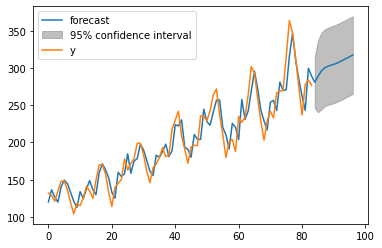

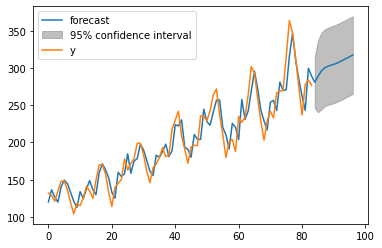

In [46]:
model = ARIMA(X, order=(2,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 97)

calculating error

In [47]:
ed=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(ed[1], forecast))
rmse

58.637679586250144

In [48]:
air3 = pd.read_excel('/content/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
X = train.values
X = X.astype('float32')

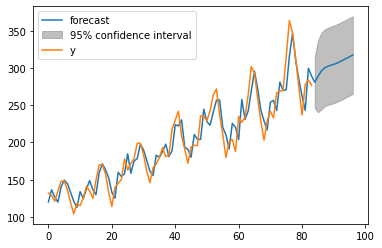

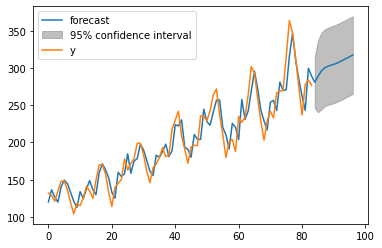

In [49]:
m = ARIMA(X, order=(2,1,1))
m_fit = m.fit() 
forecast=m_fit.forecast(steps=10)[0]
m_fit.plot_predict(1,97)

In [50]:
forecast

array([280.96558207, 288.67325895, 295.47612376, 299.84399692,
       302.21451035, 303.64927723, 305.00120059, 306.66079552,
       308.6546055 , 310.84640506])

In [51]:
list = [['Exponential Method',rmse_ses_m], ['Holt method',rmse_hst_m],['exp smoothing add',rmse_hwe_add_m],['exp smoothing mult',rmse_hwe_mul_m],['Linear Model',rmse_lm],['Exp model',rmse_Expm],['Quad model',rmse_quadm],['Persistence model', rmse_Persist_m], ['arima Model', rmse_arima_m]]

In [52]:
air4=pd.DataFrame(list,columns=['Model','RMSE_Value'])
air4

,Model,RMSE_Value
0,Exponential Method,66.155121
1,Holt method,51.196688
2,exp smoothing add,54.769123
3,exp smoothing mult,56.382620
4,Linear Model,57.000148
5,Exp model,46.621544
6,Quad model,58.494275
7,Persistence model,29.058000
8,arima Model,24.651000


**AMONG THE ABOVE MODELS ARIMA MODEL HAVE LEAST RMSE VALUE SO ARIMA VALUE CAN BE PREFERED THAN OTHER MODELS** 